Saving 2. Diagnose Diabetes.csv to 2. Diagnose Diabetes (5).csv
Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diabete

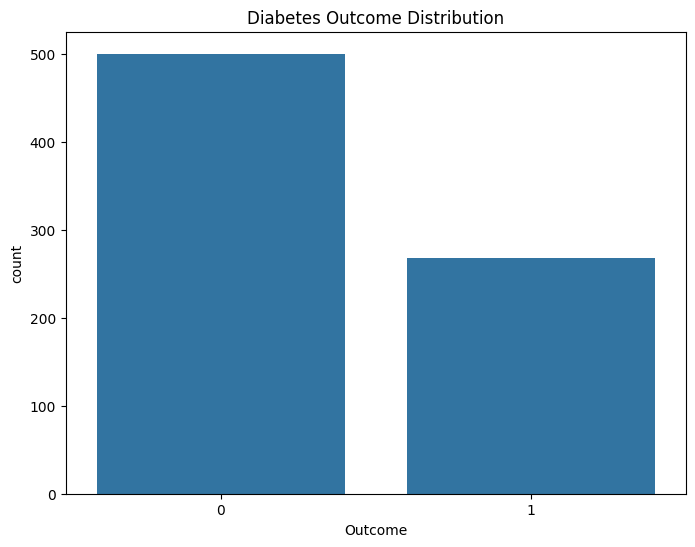


=== Logistic Regression ===
Accuracy: 75.32%
[[82 17]
 [21 34]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



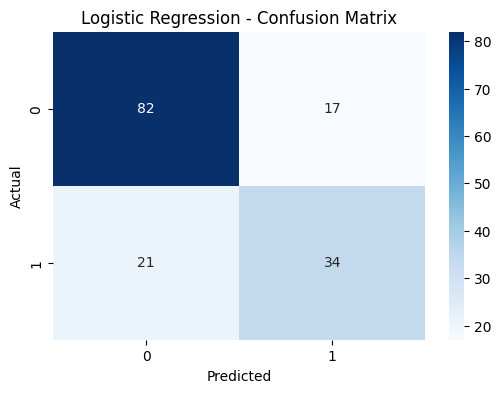


=== Random Forest ===
Accuracy: 74.03%
[[78 21]
 [19 36]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



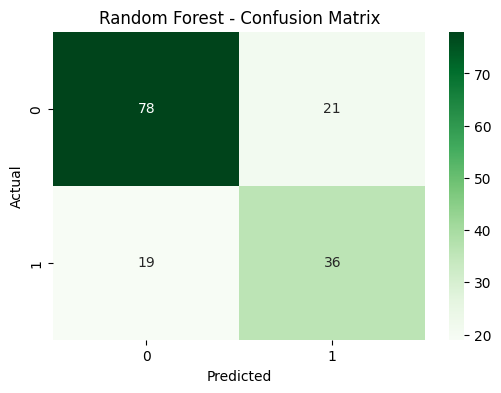

In [7]:
# Step 1: Install dependencies (Colab already has most)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Upload your CSV file to Colab
from google.colab import files
uploaded = files.upload()

# Step 3: Load the dataset
import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

# Step 4: Quick look at the data
print("Dataset shape:", df.shape)
print(df.head())

# Step 5: Check for missing values and data info
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic statistics:")
print(df.describe())

# Step 6: Replace 0s in certain columns with NaN (as 0 is invalid for medical features)
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill missing values with median (safer for skewed medical data)
df.fillna(df.median(), inplace=True)

# Step 7: EDA (optional but useful)
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

# Step 8: Feature Scaling
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Train models

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 11: Evaluation

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log) * 100
print("\n=== Logistic Regression ===")
print(f"Accuracy: {acc_log:.2f}%")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Confusion Matrix Heatmap for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf) * 100
print("\n=== Random Forest ===")
print(f"Accuracy: {acc_rf:.2f}%")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Heatmap for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
